### Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qnmfitsrd as qnmfits

sim = qnmfits.SXS(ID=305, zero_time=(2,2))

/home/rvnd2/quadratic_qnm/.conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


### Fit SXS data to simple linear model 

Modes chosen to replicate those in package_tutorial. 

**Most general list of modes:** *[(l,m,n,p) for l in range(2,L) for m in range(-l,l) for n in range(0,N) for p in [-1,1]]*


In [2]:
modes = [(l,m,n,1) for l in range(2,4) for m in range(2,3) for n in range(0,8)]

best_fit_l = qnmfits.multimode_ringdown_fit(
    sim.times,
    sim.h,
    modes,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0,
)

Mismatch = 0.29622881736862006


# Create a new model that includes quadratic terms

For now, just include (2201)x(2201) mode.

Mismatch = 0.29622881736862006


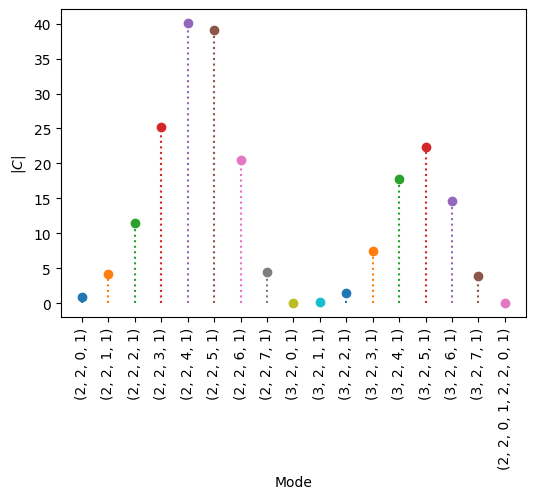

In [6]:
new_modes = modes + [(2,2,0,1,2,2,0,1)]

best_fit_q = qnmfits.multi_multimode_ringdown_fit(
    sim.times,
    sim.h,
    new_modes,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0,
)


In [ ]:

print(f"Linear mismatch = {best_fit_l['mismatch']}")
print(f"Quadratic mismatch = {best_fit_q['mismatch']}")

qnmfits.plot_mode_amplitudes(
    best_fit_q['C'], best_fit_q['mode_labels'], log=False)